<a href="https://colab.research.google.com/github/DarkKillX/MachineLearningTasks/blob/main/12WeekTasks/German_Traffic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

pandas digunakan untuk manipulasi dan analisis data.
numpy digunakan untuk operasi numerik dan penanganan array/matriks dengan efisien.
tensorflow sebagai kerangka kerja (framework) pembelajaran mesin dalam bahasa yang mendalam (deep learning).
Sequential, load_model, Conv2D, Dense, Flatten, Dropout, dan MaxPool2D dari keras.models dan keras.layers untuk membangun dan bekerja dengan model jaringan saraf menggunakan Keras, yang merupakan bagian dari TensorFlow.
train_test_split dari sklearn.model_selection untuk membagi data menjadi set data latih dan uji.
pickle digunakan untuk melakukan serialisasi dan deserialisasi objek Python.
seaborn untuk visualisasi data statistik.
matplotlib untuk membuat visualisasi dalam bahasa pemrograman Python.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


from google.colab import drive mengimpor modul drive dari paket google.colab, yang memungkinkan kamu untuk mengakses Google Drive dari sesi Google Colab.

drive.mount('/content/drive') adalah perintah untuk melakukan mounting (menyambungkan) Google Drive ke sesi Colab pada path /content/drive. Saat kamu menjalankan baris kode ini, kamu akan diminta memberikan autentikasi dan menyalin kode autentikasi ke kolom yang disediakan untuk memberikan Colab akses ke Google Drive.

In [3]:
training_file = "/content/drive/MyDrive/Datasheet/German traffic/train.p"
testing_file = "/content/drive/MyDrive/Datasheet/German traffic/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Data loaded")

Data loaded


with open(nama_file, mode='rb') as f: membuka file dalam mode baca biner ('rb').
pickle.load(f) digunakan untuk memuat objek Python dari file yang telah dibuka. Dalam hal ini, objek dari file train.p dimuat ke variabel train, sedangkan objek dari file test.p dimuat ke variabel test.

In [4]:
sign_name_df = pd.read_csv('/content/drive/MyDrive/Datasheet/German traffic/signname.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Membaca File CSV: Kode pertama menggunakan Pandas (pd) untuk membaca file CSV dari lokasi yang diberikan di Google Drive. File ini mungkin berisi informasi tentang tanda-tanda lalu lintas Jerman.

Menyimpan Nama Tanda: Kode kedua mengambil kolom 'SignName' dari DataFrame yang dibaca sebelumnya dan menyimpannya dalam variabel SIGN_NAMES. Ini kemungkinan berisi daftar nama-nama tanda yang ada dalam dataset.

Mengatur Indeks: Langkah selanjutnya adalah mengatur indeks dari DataFrame. Dalam contoh sebelumnya, kolom 'ClassId' digunakan sebagai indeks. Hal ini memungkinkan akses yang lebih mudah ke informasi tanda lalu lintas berdasarkan ID kelasnya.

Menampilkan Informasi Awal: Langkah terakhir adalah untuk menampilkan sebagian data dari DataFrame yang sudah dimuat. Biasanya, langkah ini dilakukan untuk memastikan bahwa data telah terbaca dengan benar dan untuk melihat beberapa contoh awal dari informasi yang terdapat dalam DataFrame.

In [5]:
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.style.use('ggplot'): Perintah ini mengatur gaya visualisasi grafik menggunakan Matplotlib. Dalam hal ini, gaya yang dipilih adalah 'ggplot', yang mencoba meniru gaya visual dari paket perangkat lunak statistik R yang populer, yaitu 'ggplot2'. Ini mengubah tampilan default dari grafik yang dihasilkan menggunakan Matplotlib agar lebih mirip dengan gaya 'ggplot' dari R.

%matplotlib inline: Magic command ini dari Jupyter Notebook memungkinkan plot Matplotlib ditampilkan secara langsung di dalam notebook. Ketika baris ini dieksekusi, plot yang dihasilkan akan muncul di dalam notebook, bukan dalam jendela terpisah.

%config InlineBackend.figure_format = 'retina': Pengaturan ini bertujuan untuk meningkatkan resolusi gambar pada tampilan di notebook, khususnya pada layar dengan resolusi tinggi seperti layar "retina" pada beberapa perangkat. Dengan nilai 'retina', gambar akan disajikan dengan resolusi yang lebih tinggi jika memungkinkan, sehingga memberikan tampilan yang lebih tajam dan jelas pada notebook.

In [6]:
# Define features and labels for training data
X, y = train['features'], train['labels']

# Converting lists into numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

# Define the features and labels for testing data
X_test, y_test = test['features'], test['labels']

# Converting lists into numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


X, y = train['features'], train['labels']: Di sini, data pelatihan telah dimuat sebelumnya dan terbagi menjadi fitur (features) dan label (labels). X akan berisi fitur-fitur dari data pelatihan, sedangkan y akan berisi label-label yang sesuai.

data = np.array(X) dan labels = np.array(y): Data yang awalnya disimpan dalam bentuk list (daftar) diubah menjadi array NumPy menggunakan np.array(). Hal ini sering dilakukan karena array NumPy memungkinkan operasi dan manipulasi data yang lebih efisien dalam konteks pembelajaran mesin.

print(data.shape, labels.shape): Perintah ini mencetak bentuk (shape) dari array fitur (data) dan array label (labels). Ini memberikan informasi tentang jumlah data yang ada dalam setiap variabel dan dimensi array tersebut.

X_test, y_test = test['features'], test['labels']: Proses serupa dilakukan pada data uji (testing data). Data uji juga memiliki fitur dan label yang terpisah, dan diambil dari objek test yang sudah dimuat sebelumnya.

X_test = np.array(X_test) dan y_test = np.array(y_test): Seperti pada data pelatihan, data uji juga diubah dari bentuk list ke array NumPy.

print(X_test.shape, y_test.shape): Ini mencetak bentuk (shape) dari array fitur (X_test) dan array label (y_test) untuk data uji. Ini membantu untuk memeriksa apakah dimensi data uji telah terbentuk dengan benar dan sesuai dengan harapan sebelum proses pembuatan model dimulai.

**Versi 1 persatu**

X, y = train['features'], train['labels']
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)
X_test, y_test = test['features'], test['labels']
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


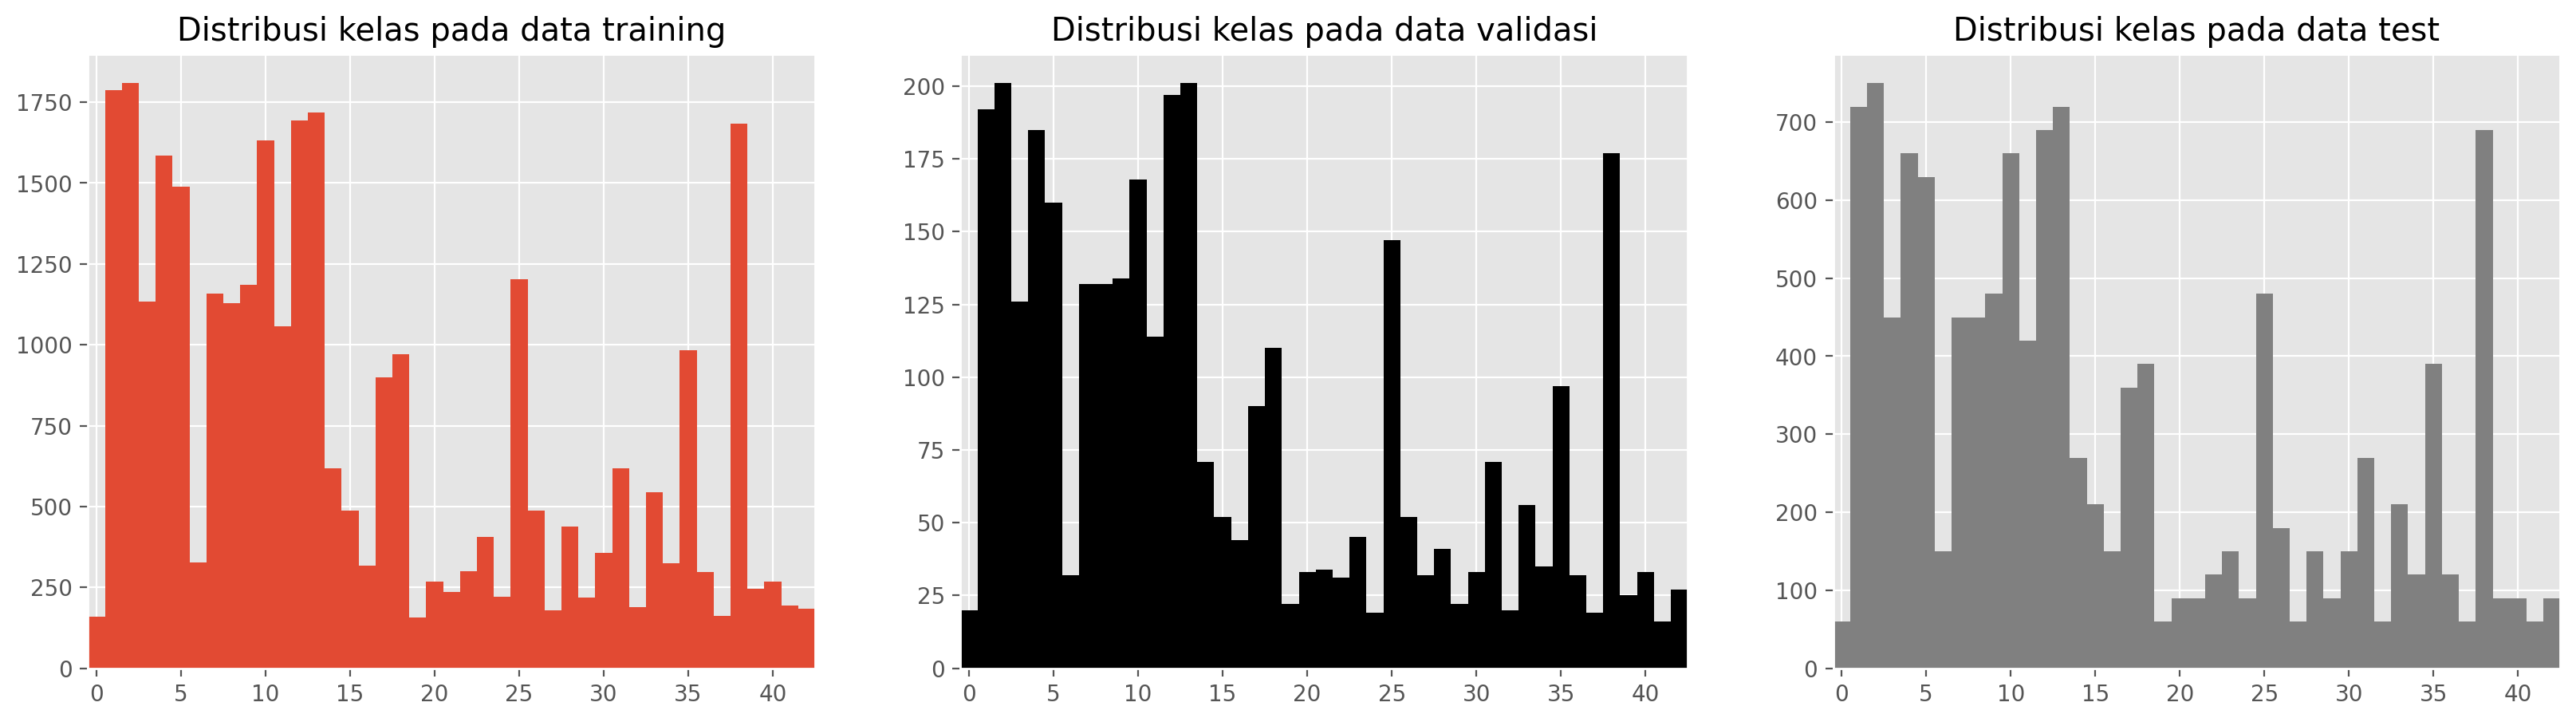

In [8]:
n_labels = np.unique(y_train).size

def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs:
        ax.legend()
    if title:
        ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            print("\nAkurasi telah mencapai >96%. Stop training!")
            self.model.stop_training = True
callbacks = myCallback()

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25
979/979 [==============================] - 14s 8ms/step - loss: 1.9036 - accuracy: 0.5057 - val_loss: 0.6288 - val_accuracy: 0.8296
Epoch 2/25
979/979 [==============================] - 5s 6ms/step - loss: 0.7552 - accuracy: 0.7719 - val_loss: 0.3059 - val_accuracy: 0.9089
Epoch 3/25
979/979 [==============================] - 6s 6ms/step - loss: 0.4802 - accuracy: 0.8555 - val_loss: 0.1430 - val_accuracy: 0.9609
Epoch 4/25
979/979 [==============================] - 6s 6ms/step - loss: 0.3639 - accuracy: 0.8908 - val_loss: 0.1453 - val_accuracy: 0.9624
Epoch 5/25
979/979 [==============================] - 5s 6ms/step - loss: 0.3267 - accuracy: 0.9031 - val_loss: 0.1206 - val_accuracy: 0.9615
Epoch 6/25
979/979 [==============================] - 7s 7ms/step - loss: 0.2717 - accuracy: 0.9185 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 7/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2708 - accuracy: 0.9216 - val_loss: 0.0824 - val_accuracy: 0.9764
Epoch

In [15]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


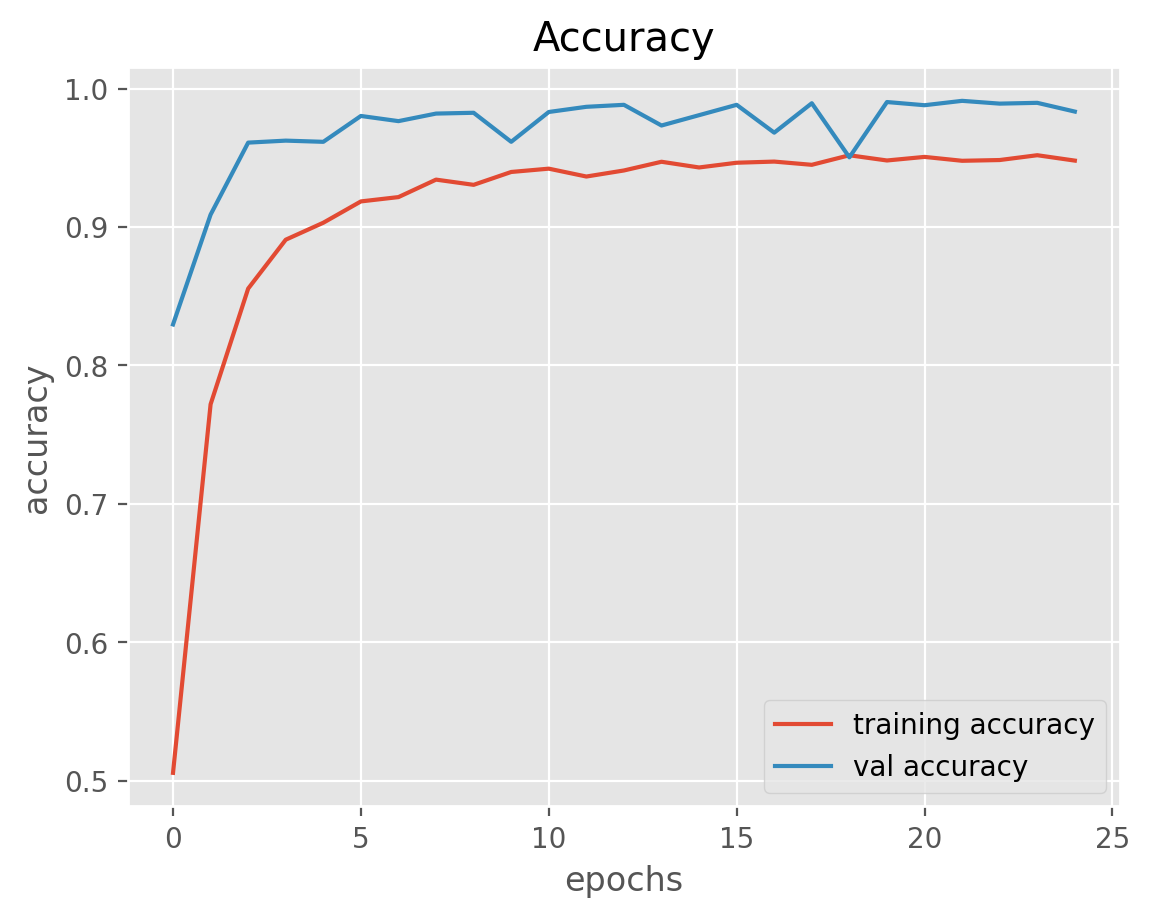

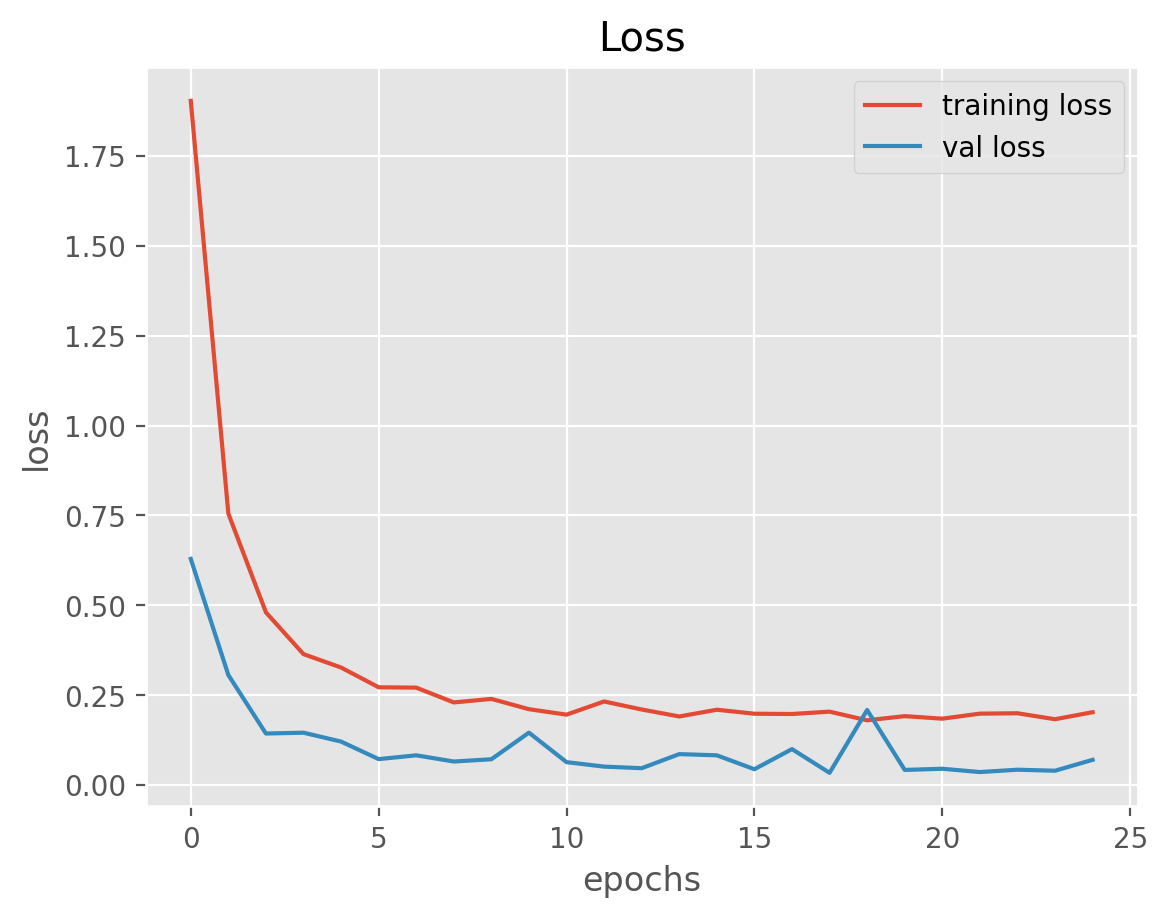

In [16]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

395/395 [==============================] - 1s 3ms/step


0.9415676959619953

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.94      0.99      0.96       720
           2       0.95      0.95      0.95       750
           3       0.86      0.90      0.88       450
           4       0.97      0.97      0.97       660
           5       0.88      0.92      0.90       630
           6       0.97      0.90      0.93       150
           7       0.96      0.90      0.93       450
           8       0.94      0.95      0.94       450
           9       0.98      0.96      0.97       480
          10       0.97      0.99      0.98       660
          11       0.92      0.95      0.94       420
          12       0.99      0.98      0.98       690
          13       0.96      1.00      0.98       720
          14       0.92      0.99      0.95       270
          15       0.98      0.90      0.94       210
          16       0.97      0.99      0.98       150
          17       0.98    